In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

from pathlib import Path

In [2]:
# Prompt the user to enter the data path
data_path = input("Please enter the (downloaded) data path: ")
data_path = Path(data_path) / 'ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData'

In [3]:
subj = 'BraTS-GLI-00126-000'

In [4]:
files = list(Path(f"{data_path}/{subj}/").glob('*.nii.gz'))

In [5]:
# load seg from files where seg is in the name
segmentation_labels = nib.load([f for f in files if 'seg' in f.name][0]).get_fdata()

In [6]:
# find which slice has the most classes
max_classes = 0
max_slice = 0
for i in range(segmentation_labels.shape[2]):
    classes = len(np.unique(segmentation_labels[:, :, i]))
    if classes > max_classes:
        max_classes = classes
        max_slice = i

In [7]:
print(f'Max classes: {max_classes} on slice {max_slice}')

Max classes: 4 on slice 69


In [8]:
# Background (label 0)
bg = np.zeros_like(segmentation_labels)
bg[segmentation_labels == 0] = 1
bg[segmentation_labels != 0] = 0
# Necrotic Tumor Core (NCR - label 1)
ncr = np.zeros_like(segmentation_labels)
ncr[segmentation_labels == 1] = 1
# Peritumoral Edematous/Invaded Tissue (ED - label 2)
ed = np.zeros_like(segmentation_labels)
ed[segmentation_labels == 2] = 1
# GD-Enhancing Tumor (ET - label 3)
et = np.zeros_like(segmentation_labels)
et[segmentation_labels == 3] = 1
# Whole Tumor (WT — label 1, 2, or 3)
wt = np.zeros_like(segmentation_labels)
wt[segmentation_labels != 0] = 1

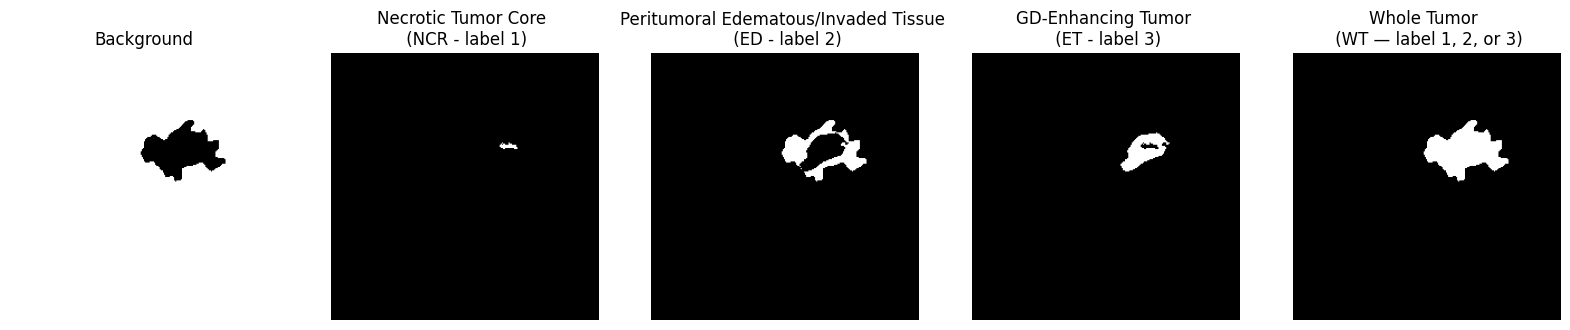

In [9]:
# visualize the segmentation classes
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].imshow(bg[:, :, max_slice], cmap='gray')
ax[0].set_title('Background')
ax[0].axis('off')
ax[1].imshow(ncr[:, :, max_slice], cmap='gray')
ax[1].set_title('Necrotic Tumor Core \n (NCR - label 1)')
ax[1].axis('off')
ax[2].imshow(ed[:, :, max_slice], cmap='gray')
ax[2].set_title('Peritumoral Edematous/Invaded Tissue \n (ED - label 2)')
ax[2].axis('off')
ax[3].imshow(et[:, :, max_slice], cmap='gray')
ax[3].set_title('GD-Enhancing Tumor \n (ET - label 3)')
ax[3].axis('off')
ax[4].imshow(wt[:, :, max_slice], cmap='gray')
ax[4].set_title('Whole Tumor \n (WT — label 1, 2, or 3)')
ax[4].axis('off')
plt.show()

In [10]:
# load the T1c image
t1c_data = nib.load([f for f in files if 't1c' in f.name][0]).get_fdata()
# load the T1n image
t1n_data = nib.load([f for f in files if 't1n' in f.name][0]).get_fdata()
# load the T2f image
t2f_data = nib.load([f for f in files if 't2f' in f.name][0]).get_fdata()
# load the T2w image
t2w_data = nib.load([f for f in files if 't2w' in f.name][0]).get_fdata()

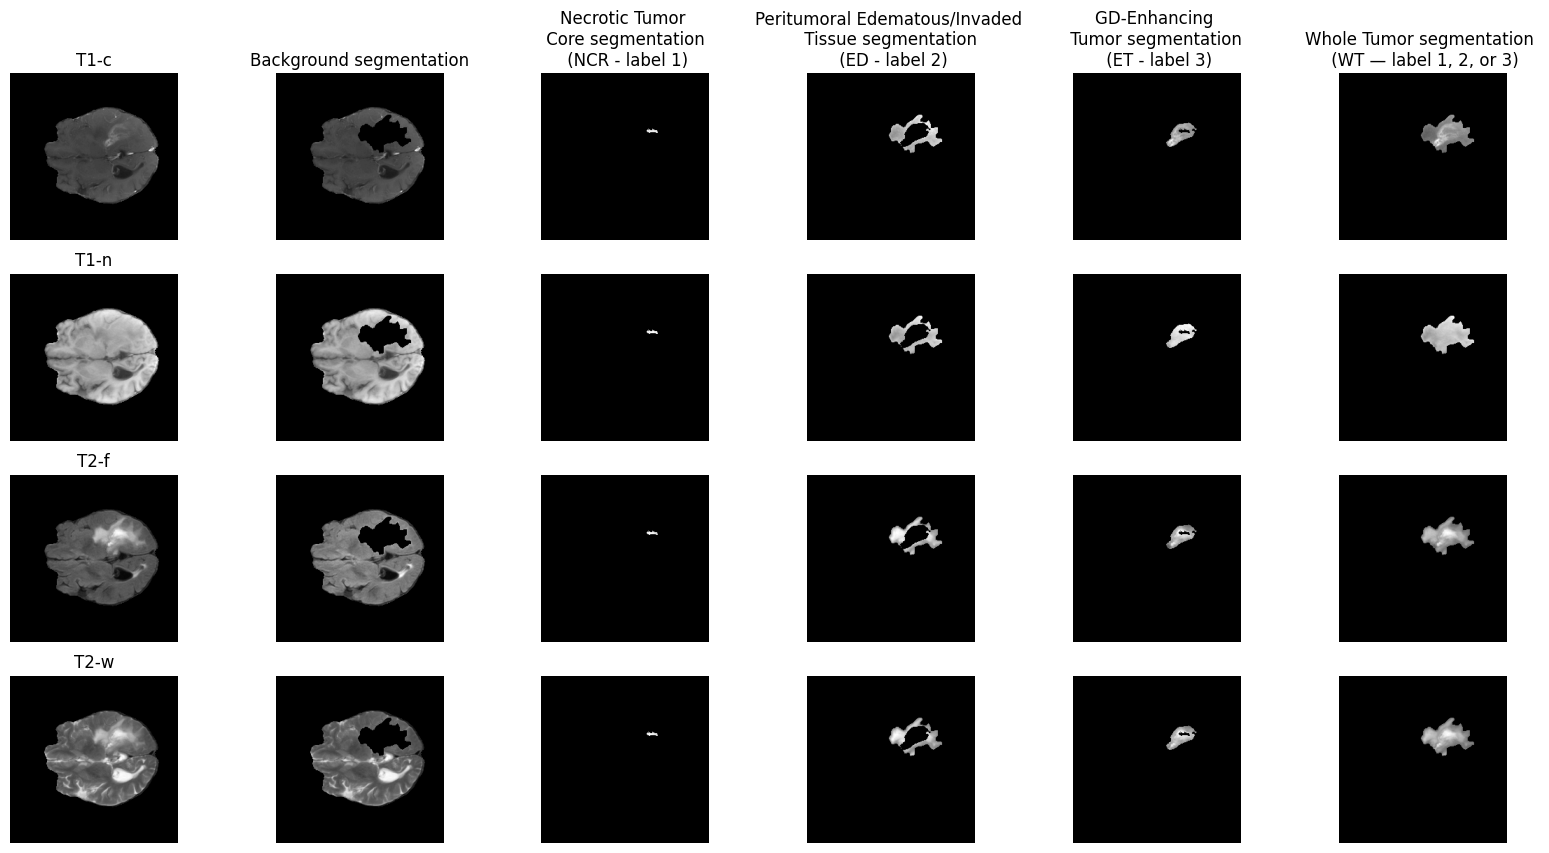

In [11]:
# visualize the data and segment them
fig, ax = plt.subplots(4, 6, figsize=(20, 10))
ax[0, 0].imshow(t1c_data[:, :, max_slice], cmap='gray')
ax[0, 0].set_title('T1-c')
ax[0, 0].axis('off')
ax[0, 1].imshow(t1c_data[:, :, max_slice] * bg[:, :, max_slice], cmap='gray')
ax[0, 1].set_title('Background segmentation')
ax[0, 1].axis('off')
ax[0, 2].imshow(t1c_data[:, :, max_slice] * ncr[:, :, max_slice], cmap='gray')
ax[0, 2].set_title('Necrotic Tumor \n Core segmentation \n (NCR - label 1)')
ax[0, 2].axis('off')
ax[0, 3].imshow(t1c_data[:, :, max_slice] * ed[:, :, max_slice], cmap='gray')
ax[0, 3].set_title('Peritumoral Edematous/Invaded \n Tissue segmentation \n (ED - label 2)')
ax[0, 3].axis('off')
ax[0, 4].imshow(t1c_data[:, :, max_slice] * et[:, :, max_slice], cmap='gray')
ax[0, 4].set_title('GD-Enhancing \n Tumor segmentation \n (ET - label 3)')
ax[0, 4].axis('off')
ax[0, 5].imshow(t1c_data[:, :, max_slice] * wt[:, :, max_slice], cmap='gray')
ax[0, 5].set_title('Whole Tumor segmentation \n (WT — label 1, 2, or 3)')
ax[0, 5].axis('off')
ax[1, 0].imshow(t1n_data[:, :, max_slice], cmap='gray')
ax[1, 0].set_title('T1-n')
ax[1, 0].axis('off')
ax[1, 1].imshow(t1n_data[:, :, max_slice] * bg[:, :, max_slice], cmap='gray')
ax[1, 1].axis('off')
ax[1, 2].imshow(t1n_data[:, :, max_slice] * ncr[:, :, max_slice], cmap='gray')
ax[1, 2].axis('off')
ax[1, 3].imshow(t1n_data[:, :, max_slice] * ed[:, :, max_slice], cmap='gray')
ax[1, 3].axis('off')
ax[1, 4].imshow(t1n_data[:, :, max_slice] * et[:, :, max_slice], cmap='gray')
ax[1, 4].axis('off')
ax[1, 5].imshow(t1n_data[:, :, max_slice] * wt[:, :, max_slice], cmap='gray')
ax[1, 5].axis('off')
ax[2, 0].imshow(t2f_data[:, :, max_slice], cmap='gray')
ax[2, 0].set_title('T2-f')
ax[2, 0].axis('off')
ax[2, 1].imshow(t2f_data[:, :, max_slice] * bg[:, :, max_slice], cmap='gray')
ax[2, 1].axis('off')
ax[2, 2].imshow(t2f_data[:, :, max_slice] * ncr[:, :, max_slice], cmap='gray')
ax[2, 2].axis('off')
ax[2, 3].imshow(t2f_data[:, :, max_slice] * ed[:, :, max_slice], cmap='gray')
ax[2, 3].axis('off')
ax[2, 4].imshow(t2f_data[:, :, max_slice] * et[:, :, max_slice], cmap='gray')
ax[2, 4].axis('off')
ax[2, 5].imshow(t2f_data[:, :, max_slice] * wt[:, :, max_slice], cmap='gray')
ax[2, 5].axis('off')
ax[3, 0].imshow(t2w_data[:, :, max_slice], cmap='gray')
ax[3, 0].set_title('T2-w')
ax[3, 0].axis('off')
ax[3, 1].imshow(t2w_data[:, :, max_slice] * bg[:, :, max_slice], cmap='gray')
ax[3, 1].axis('off')
ax[3, 2].imshow(t2w_data[:, :, max_slice] * ncr[:, :, max_slice], cmap='gray')
ax[3, 2].axis('off')
ax[3, 3].imshow(t2w_data[:, :, max_slice] * ed[:, :, max_slice], cmap='gray')
ax[3, 3].axis('off')
ax[3, 4].imshow(t2w_data[:, :, max_slice] * et[:, :, max_slice], cmap='gray')
ax[3, 4].axis('off')
ax[3, 5].imshow(t2w_data[:, :, max_slice] * wt[:, :, max_slice], cmap='gray')
ax[3, 5].axis('off')
plt.show()